In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# deep learning
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

In [3]:
df = pd.read_csv("clean_data.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
# Check whether target data is balanced or imbalanced
df.Target.value_counts()

0    8426
1    1283
Name: Target, dtype: int64

What we notice here is that the dataset is balanced. So we need to use SMOTE to oversample and balance the dataset. We should do this at the end before the test split

Columns to drop: Work_phone, Phone, Email

In [5]:
df = df.drop(['Work_phone', 'Phone', 'Email'], axis=1)

In [6]:
for i in [4,5,7,14,19]:
    df.Num_children = df.Num_children.replace(i,3)

In [7]:
for i in [5,6,7,9,15,20]:
    df.Num_family = df.Num_family.replace(i,4)

In [8]:
df.Housing_type.value_counts()

House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: Housing_type, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Unemployed       9709 non-null   int64  
 5   Num_children     9709 non-null   int64  
 6   Num_family       9709 non-null   int64  
 7   Account_length   9709 non-null   int64  
 8   Total_income     9709 non-null   float64
 9   Age              9709 non-null   float64
 10  Years_employed   9709 non-null   float64
 11  Income_type      9709 non-null   object 
 12  Education_type   9709 non-null   object 
 13  Family_status    9709 non-null   object 
 14  Housing_type     9709 non-null   object 
 15  Occupation_type  9709 non-null   object 
 16  Target           9709 non-null   int64  
dtypes: float64(3),

In [10]:
df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children',
       'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed',
       'Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type', 'Target'],
      dtype='object')

Need to do the following:
(1) One-hot
(2) Standard Scaler
(3) SMOTE

In [11]:
df_categ = df.loc[:, ['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type']]

In [12]:
df_numerical = df.loc[:, ['Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children',
       'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']]

In [13]:
df_numerical.head()

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed
0,1,1,1,0,0,2,15,427500.0,32.868574,12.435574
1,1,1,1,0,0,2,29,112500.0,58.793815,3.104787
2,0,0,1,0,0,1,4,270000.0,52.321403,8.353354
3,0,0,1,1,0,1,20,283500.0,61.504343,0.000000
4,1,1,1,0,0,2,5,270000.0,46.193967,2.105450


In [14]:
df_categ_one_hot = pd.get_dummies(df_categ)
df_categ_one_hot

,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9705,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9706,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9707,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
df_combined = pd.concat([df_numerical, df_categ_one_hot], axis=1)
df_combined

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,1,1,1,0,0,2,15,427500.0,32.868574,12.435574,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,2,29,112500.0,58.793815,3.104787,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,4,270000.0,52.321403,8.353354,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,1,20,283500.0,61.504343,0.000000,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,...,0,0,0,0,0,0,0,0,0,0
9705,0,0,1,0,0,2,19,112500.0,43.360233,7.375921,...,0,0,0,1,0,0,0,0,0,0
9706,1,1,1,0,0,2,21,90000.0,52.296762,4.711938,...,0,0,0,1,0,0,0,0,0,0
9707,0,0,1,0,0,2,32,157500.0,33.914454,3.627727,...,0,0,1,0,0,0,0,0,0,0


In [16]:
X = df_combined.values
y = df.loc[:, ["Target"]].values.ravel()

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [19]:
from imblearn.over_sampling._smote.base import Counter
print(f"Sampling class distrubution Before:", Counter(y))
print(f"Sampling class distrubution After:", Counter(y_smote))


Sampling class distrubution Before: Counter({0: 8426, 1: 1283})
Sampling class distrubution After: Counter({1: 8426, 0: 8426})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.8 : 0.2


In [23]:
pd.DataFrame(y_smote).value_counts()

0    8426
1    8426
dtype: int64

In [24]:
pd.DataFrame(y_train).value_counts()

0    6741
1    1026
dtype: int64

In [25]:
len(X_smote)

16852

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_smote)

# Scale the data
X_train_smote_scaled = X_scaler.transform(X_smote)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[4887 3539]
 [4015 4411]]

                  precision    recall  f1-score   support

           0       0.55      0.58      0.56      8426
           1       0.55      0.52      0.54      8426

    accuracy                           0.55     16852
   macro avg       0.55      0.55      0.55     16852
weighted avg       0.55      0.55      0.55     16852

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[934 751]
 [123 134]]

                  precision    recall  f1-score   support

           0       0.88      0.55      0.68      1685
           1       0.15      0.52      0.23       257

    accuracy                           0.55      1942
   macro avg       0.52      0.54      0.46      1942
weighted avg       0.79      0.55      0.62      1942

    

AUC for the Model Test Set: 0.5581706289184727


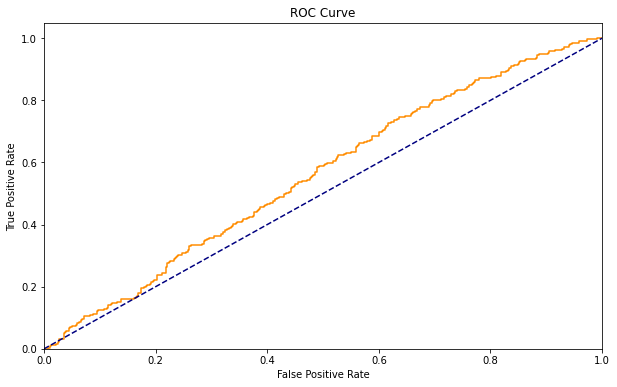

Brier Score:
477.9271513275489


In [40]:
lr = LogisticRegression(max_iter=10000)
evaluateModel(lr, X_smote, X_test, y_smote, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[8426    0]
 [   7 8419]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      8426
           1       1.00      1.00      1.00      8426

    accuracy                           1.00     16852
   macro avg       1.00      1.00      1.00     16852
weighted avg       1.00      1.00      1.00     16852

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[1685    0]
 [   2  255]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1685
           1       1.00      0.99      1.00       257

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942

    

AUC for the Model Test Set: 1.0


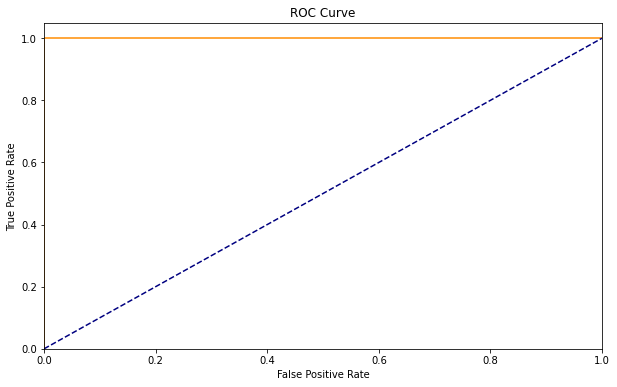

Brier Score:
32.23959999999967


In [41]:
rf = RandomForestClassifier(random_state=42, n_estimators=50)

evaluateModel(rf, X_smote, X_test, y_smote, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[8421    5]
 [ 941 7485]]

                  precision    recall  f1-score   support

           0       0.90      1.00      0.95      8426
           1       1.00      0.89      0.94      8426

    accuracy                           0.94     16852
   macro avg       0.95      0.94      0.94     16852
weighted avg       0.95      0.94      0.94     16852

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[1685    0]
 [ 175   82]]

                  precision    recall  f1-score   support

           0       0.91      1.00      0.95      1685
           1       1.00      0.32      0.48       257

    accuracy                           0.91      1942
   macro avg       0.95      0.66      0.72      1942
weighted avg       0.92      0.91      0.89      1942

    

AUC for the Model Test Set: 0.9641157385491115


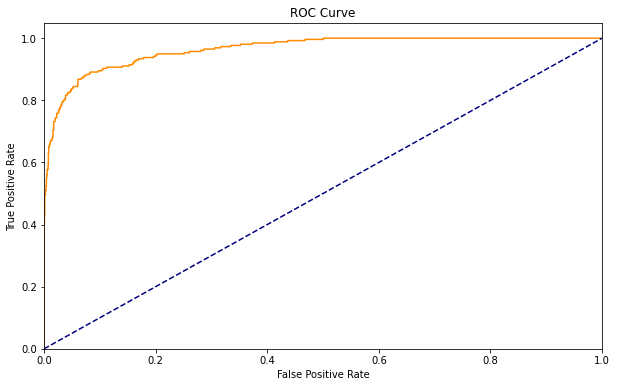

Brier Score:
121.49641092307343


In [42]:
xgb = XGBClassifier(random_state=42)

evaluateModel(xgb, X_smote, X_test, y_smote, y_test)

In [43]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4080      
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Define the deep learning model 


# Compile the Sequential model together and customize metrics
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

# Train the model
fit_model = nn.fit(X_smote,y_smote,epochs=100)
# Evaluate the model using the test data

Epoch 1/100
527/527 [==============================] - 2s 3ms/step - loss: 3.7628 - accuracy: 0.5066
Epoch 2/100
527/527 [==============================] - 1s 2ms/step - loss: 2.7033 - accuracy: 0.5103
Epoch 3/100
527/527 [==============================] - 1s 1ms/step - loss: 2.2524 - accuracy: 0.5133
Epoch 4/100
527/527 [==============================] - 1s 1ms/step - loss: 1.8105 - accuracy: 0.5186
Epoch 5/100
527/527 [==============================] - 1s 2ms/step - loss: 1.6768 - accuracy: 0.5209
Epoch 6/100
527/527 [==============================] - 1s 2ms/step - loss: 1.6140 - accuracy: 0.5159
Epoch 7/100
527/527 [==============================] - 1s 2ms/step - loss: 1.4411 - accuracy: 0.5163
Epoch 8/100
527/527 [==============================] - 1s 1ms/step - loss: 1.4462 - accuracy: 0.5158
Epoch 9/100
527/527 [==============================] - 1s 1ms/step - loss: 1.3767 - accuracy: 0.5115
Epoch 10/100
527/527 [==============================] - 1s 1ms/step - loss: 1.1077 - accura

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 0s - loss: 0.8804 - accuracy: 0.3326 - 193ms/epoch - 3ms/step
Loss: 0.8803801536560059, Accuracy: 0.33264675736427307
